# Numerical Linear Algebra (FMNN01)
__LTH Fall 2019__
## Assignment 3
__Jonas Lundgren__

In [1]:
from scipy.linalg import qr, svd, inv, hilbert, invhilbert
import numpy as np
import matplotlib.pyplot as plt

# Task 1

Let $\textbf{X} = [sin(\textbf{x}) \; cos(\textbf{x}) \; sin(2\textbf{x}) \; cos(2\textbf{x})]$ a $200 \times 4$ matrix where $\textbf{x}$ is the vector containing the 200 points in $[0, \; 2\pi]$ where the signal was measured. And $\textbf{y}$ a vector of length 200 containing the values of the signal. And $\theta = [a \; b \; c \;d]$ a vector of legnth 4 containing the constatnts we are trying to estimate. The least squares problem is then defined as: $$ \min\limits_{\theta} \| \textbf{X}\theta - \textbf{y} \|_2$$

__Solving approach 1 (normal equations):__   
Since $\textbf{X} = [sin(\textbf{x}) \; cos(\textbf{x}) \; sin(2\textbf{x}) \; cos(2\textbf{x})]$ is full rank we know $A^\top A$ is invertible and $\theta$ can be given by: 
$$0 = \textbf{X}\theta - \textbf{y} \Leftrightarrow \textbf{X}^\top \textbf{X}\theta = \textbf{X}^\top \textbf{y} \Leftrightarrow \theta = (\textbf{X}^\top \textbf{X})^{-1} \textbf{X}^\top \textbf{y}$$ 
which are the normal equations.

__Solving approach 2 (QR)__  
Compute the QR decomposition $\textbf{Q}\textbf{R} = \textbf{X}$ and let: 
$$ \min\limits_{\theta} \| \textbf{X}\theta - \textbf{y} \|_2 
= \min\limits_{\theta} \| \textbf{Q} \textbf{R} \theta - \textbf{y} \|_2 
= \min\limits_{\theta} \| \textbf{R} \theta - \textbf{Q}^\top \textbf{y} \|_2$$
which is minimized when $\textbf{R} \theta = \textbf{Q}^\top \textbf{y}$.

__Solving approach 3 (SVD):__   
Let $\textbf{X} = \textbf{U} \Sigma \textbf{V}^\top$, giving: 
$$ \min\limits_{\theta} \| \textbf{X}\theta - \textbf{y} \|_2
= \min\limits_{\theta} \| \textbf{U} \Sigma \textbf{V}^\top \theta - \textbf{y} \|_2 
= \min\limits_{\theta} \|\textbf{U}^\top \textbf{U} \Sigma \textbf{V}^\top \theta - \textbf{U}^\top \textbf{y} \|_2 = \min\limits_{\theta} \|\Sigma \textbf{V}^\top \theta - \textbf{U}^\top \textbf{y} \|_2$$

Which is minimized when $\hat{\Sigma} \textbf{V}^\top \theta = \textbf{U}^\top \textbf{y} \Leftrightarrow \hat{\Sigma} \textbf{w} = \textbf{U}^\top \textbf{y}$ and we get $\textbf{w} = \hat{\Sigma}^{-1} \textbf{U}^\top \textbf{y}$ and $\theta = \textbf{V} \textbf{w}$ since ${\textbf{V}^{\top}}^{-1}= \textbf{V}$.

Lets set up the data.

In [2]:
#importing the data
signal = np.loadtxt("signal.dat", delimiter= ",")

In [3]:
x = signal[:, 0]
y = signal[:, 1]

In [4]:
X = np.column_stack([np.sin(x), np.cos(x), np.sin(2*x), np.cos(2*x)])
#Check the dimenstions of X
print("Shape of X:", np.shape(X))

Shape of X: (200, 4)


### Using the QR-factorization

In [5]:
Q, R = qr(X)

We check __R__ if it is upper triangular with only values for the first 4 rows. 

In [6]:
np.round(R[:10,],4)

array([[ -9.975 ,  -0.    ,  -0.    ,  -0.    ],
       [  0.    , -10.025 ,  -0.    ,  -0.0998],
       [  0.    ,   0.    ,  -9.975 ,   0.    ],
       [  0.    ,   0.    ,   0.    , -10.0245],
       [  0.    ,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    ,   0.    ],
       [  0.    ,   0.    ,   0.    ,   0.    ]])

Seems to correspond with our expectation. We throw away what we dont need from __R__.

In [7]:
R_hat = R[:4,:]
np.round(R_hat, 3)

array([[ -9.975,  -0.   ,  -0.   ,  -0.   ],
       [  0.   , -10.025,  -0.   ,  -0.1  ],
       [  0.   ,   0.   ,  -9.975,   0.   ],
       [  0.   ,   0.   ,   0.   , -10.024]])

And from __Q__.

In [8]:
Q_T_hat = Q.T[:4, :]
np.shape(Q_T_hat)

(4, 200)

$x = A^{-1}'b$ $x = (QR)^{-1}b$

In [9]:
theta = inv(R_hat)@Q_T_hat@y
print("Using QR gives: [a b c d] =", np.round(theta,3))

Using QR gives: [a b c d] = [ 3.  5. 10. -5.]


Lets put it all in a function and so we can compare the time with other methods.

In [10]:
def least_squares_qr(X, y):
    
    m,n = np.shape(X)
    
    Q, R = qr(X)
    R_hat = R[:n,:]
    Q_T_hat = Q.T[:n, :]
    theta = inv(R_hat)@Q_T_hat@y
    
    return theta

### Using the SVD

In [11]:
U, S, Vt = svd(X)

In [12]:
S = np.diagflat(S)
S

array([[10.07472084,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  9.97496867,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  9.97496867,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  9.97496867]])

In [13]:
U_t_hay = U.T[:len(S), :]

In [14]:
w = inv(S) @ U_t_hay @ y

In [15]:
theta = Vt.T @ w
print("Using SVD gives: [a b c d] =", np.round(theta,3))

Using SVD gives: [a b c d] = [ 3.  5. 10. -5.]


Lets put it all in a function and so we can compare the time with other methods.

In [16]:
def least_squares_svd(X, y):
    
    m,n = np.shape(X)
    
    U, S, Vt = svd(X)
    S = np.diagflat(S)
    U_t_hay = U.T[:n, :]
    w = inv(S) @ U_t_hay @ y
    theta = Vt.T @ w
    
    return theta

### Comparing the results

In [17]:
%%time 
for i in range(10000):
    theta_qr = least_squares_qr(X,y)

CPU times: user 9.2 s, sys: 80.8 ms, total: 9.28 s
Wall time: 4.68 s


In [18]:
%%time 
for i in range(10000):
    theta_svd = least_squares_svd(X,y)

CPU times: user 5.64 s, sys: 20.1 ms, total: 5.66 s
Wall time: 2.83 s


In [19]:
y_qr = X @ theta_qr
y_svd = X @ theta_svd

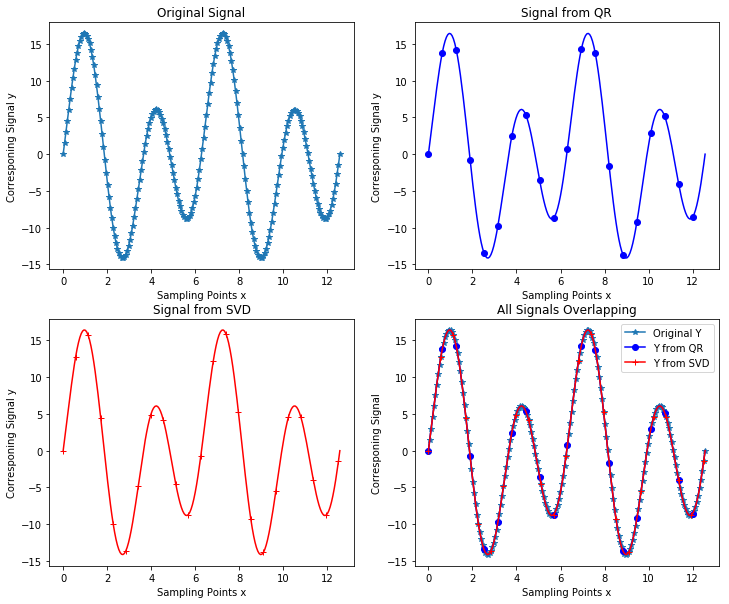

In [20]:
fig, ax = plt.subplots(2,2, figsize = [12,10])

ax[0,0].plot(x, y, marker = "*")
ax[0,0].set_title("Original Signal")
ax[0,0].set_xlabel("Sampling Points x")
ax[0,0].set_ylabel("Corresponing Signal y")

ax[0,1].plot(x, y_qr, '-bo', markevery = 10)
ax[0,1].set_title("Signal from QR")
ax[0,1].set_xlabel("Sampling Points x")
ax[0,1].set_ylabel("Corresponing Signal y")

ax[1,0].plot(x, y_svd, '-r+', markevery = 9)
ax[1,0].set_title("Signal from SVD")
ax[1,0].set_xlabel("Sampling Points x")
ax[1,0].set_ylabel("Corresponing Signal y")


ax[1,1].plot(x, y, label='Original Y', marker = "*")
ax[1,1].plot(x, y_qr, '-bo', markevery = 10, label='Y from QR')
ax[1,1].plot(x, y_svd, '-r+', markevery = 9, label='Y from SVD')
ax[1,1].set_title("All Signals Overlapping")
ax[1,1].set_xlabel("Sampling Points x")
ax[1,1].set_ylabel("Corresponing Signal")
ax[1,1].legend();

# Task 3

In [21]:
H = hilbert(50)
U, s, Vt = svd(H)
sigma_1 = s[0]
sigma_n = s[-1]

K = sigma_1/sigma_n
print("Condition number :", K)

Condition number : 1.4307571449895808e+16


In [22]:
x = invhilbert(50)@U[:,0]
dx = invhilbert(50)@U[:,-1]

print("LHS :", np.linalg.norm(dx,2)/np.linalg.norm(x,2))
print("RHS :", K * np.linalg.norm(U[:,-1],2)/np.linalg.norm(U[:,0],2))

LHS : 1.5037758129990436e+16
RHS : 1.4307571449895798e+16


Close enough for the large hilbert matrix. We cant expect the results to be too close due to the large value for $\kappa_2(A)$. Taking a smaller matrix would result in closer LHS and RHS:

In [23]:
dim = 5
H = hilbert(dim)
U, s, Vt = svd(H)

x = invhilbert(dim)@U[:,0]
dx = invhilbert(dim)@U[:,-1]

print("LHS :", np.linalg.norm(dx,2)/np.linalg.norm(x,2))
print("RHS :", s[0]/s[-1] * np.linalg.norm(U[:,-1],2)/np.linalg.norm(U[:,0],2))

LHS : 476607.25024291105
RHS : 476607.25024100073
